# 讀入套件

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 讀入資料並修改資料

In [79]:
from tensorflow.keras.datasets import fashion_mnist

In [80]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [81]:
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255

In [82]:
from tensorflow.keras.utils import to_categorical

In [83]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 開始打造CNN

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [85]:
model=Sequential()

In [86]:
model.add(Conv2D(9,(2,2),padding='same',
                input_shape=(28,28,1),
               activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [87]:
model.add(Conv2D(27,(2,2),padding='same',
                activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [88]:
model.add(Conv2D(81,(2,2),padding='same',
                activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [89]:
model.add(Flatten())

In [90]:
model.add(Dense(20, activation='tanh'))

In [91]:
model.add(Dense(10, activation='softmax'))

### 上面我修改了activation將relu換成了tanh。以及將filter改成了3*3矩陣並用了9 27 81個filter ，3的次方倍的數字。全連結則維持一層，但神經元改用20個。

# 觀察CNN

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 9)         45        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 9)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 27)        999       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 27)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 81)          8829      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 81)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 729)              

In [93]:
model.compile(loss='mse', optimizer=SGD(lr=0.87),
             metrics=['accuracy'])

### 我將leaning rate改成了0.87

# 訓練CNN

In [94]:
model.fit(x_train, y_train, batch_size=15, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0287 - accuracy: 0.7919
Epoch 2/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0185 - accuracy: 0.8726
Epoch 3/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.0162 - accuracy: 0.8883
Epoch 4/5
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0147 - accuracy: 0.8993
Epoch 5/5
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0138 - accuracy: 0.9060


# 預測

In [101]:
result = model.predict_classes(x_test)

In [102]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [103]:
def pred(n):
    print("CNN預測是",class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap="Greys")

CNN預測是 Coat


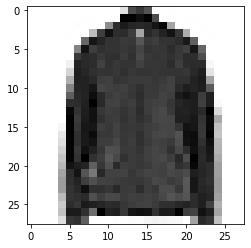

In [106]:
pred(2467)

In [107]:
from ipywidgets import interact_manual

In [108]:
interact_manual(pred, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.pred(n)>

# 測試CNN準確度

In [109]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 588us/sample - loss: 0.0184 - accuracy: 0.8729


In [110]:
loss, acc = score

In [111]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8729


### 正確率差了約略3%

# 儲存model

In [112]:
model.save('myCNNmodel.h5')